In [16]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import numpy as np
import statistics as stats
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
#AAPL: APPLE; GE: GENERAL ELECTRIC; "F": FORD; "AAL": AMERICAN AIRLINES; "DAL": DELTA AIRLINES; "BAC": BANK OF AMERICA
lista_etiquetas = ["AAPL", "GE", "F", "AAL", "DAL", "BAC"]
diccionario_posiciones = {"AAPL":0, "GE":1, "F":2, "AAL":3, "DAL":4, "BAC":5}
lista_dataframes = [0]*(len(etiquetas))
lista_rendimiento_logaritmico_minimo = []
lista_rendimiento_logaritmico_maximo = []
lista_rendimiento_logaritmico_promedio = []
lista_volatilidad = []


for etiqueta in lista_etiquetas:
    lista_dataframes[diccionario_posiciones[etiqueta]] = pdr.get_data_yahoo(etiqueta, start = datetime.datetime(2010,1,1), end = datetime.datetime(2020,1,1))
    
for dataframe in lista_dataframes:
    nombres_columnas = ["Precio_Maximo", "Precio_Minimo", "Precio_Apertura", "Precio_Cierre", "Volumen", "Precio_Cierre_Ajustado"]
    dataframe.columns = nombres_columnas
    #Vamos a calcular los rendimientos logaritmicos
    lista_rendimientos_logaritmicos = []
    for i in range(len(dataframe.Precio_Cierre_Ajustado)-1):
        ret_log = np.log(dataframe.Precio_Cierre_Ajustado[i+1] / dataframe.Precio_Cierre_Ajustado[i])
        lista_rendimientos_logaritmicos.append(ret_log)
    #El primer valor de mi columna de rendimimentos debe ser cero    
    lista_rendimientos_logaritmicos.insert(0,0)
    #Ahora si puedo agregar los datos a la columna
    dataframe["Retorno_Logaritmico"] = lista_rendimientos_logaritmicos

    #Calculamos el rendimiento logarítmico promedio.
    rendimiento_logaritmico_promedio = stats.mean(dataframe.Retorno_Logaritmico)
    #Calculamos la volatilidad del rendimiento logarítmico (Desviación Estándar)
    volatilidad_rendimiento_logaritmico = stats.stdev(dataframe.Retorno_Logaritmico)
    #Calculamos el rendimiento logarítmico máximo.
    rendimiento_logaritmico_maximo = max(dataframe.Retorno_Logaritmico)
    #Calculamos el rendimiento logarítmico mínimo.
    rendimiento_logaritmico_minimo = min(dataframe.Retorno_Logaritmico)
    
    #Agregamos los datos a nuestras listas
    lista_rendimiento_logaritmico_minimo.append(rendimiento_logaritmico_minimo)
    lista_rendimiento_logaritmico_maximo.append(rendimiento_logaritmico_maximo)
    lista_rendimiento_logaritmico_promedio.append(rendimiento_logaritmico_promedio)
    lista_volatilidad.append(volatilidad_rendimiento_logaritmico)
    
    

#Armamos un Nuevo Data Frame que resuma información básica de la acción: precio maximo y minimo; retorno máximo, mínimo y medio; desvío (volatilidad).
df_presentacion = pd.DataFrame(data = {"Empresa":lista_etiquetas, "Rendimiento_Minimo": lista_rendimiento_logaritmico_minimo, \
                                       "Rendimiento_Maximo": lista_rendimiento_logaritmico_maximo,\
                                      "Rendimiento_Promedio": lista_rendimiento_logaritmico_promedio, "Volatilidad": lista_volatilidad})
df_presentacion
    
    

,Empresa,Rendimiento_Minimo,Rendimiento_Maximo,Rendimiento_Promedio,Volatilidad
0,AAPL,-0.131885,0.085022,0.000954,0.016237
1,GE,-0.119862,0.110184,0.000015,0.016635
2,F,-0.144002,0.102057,0.000101,0.017500
3,AAL,-0.172191,0.159707,0.000735,0.028271
4,DAL,-0.122791,0.104360,0.000701,0.022182
5,BAC,-0.227129,0.154809,0.000364,0.020533


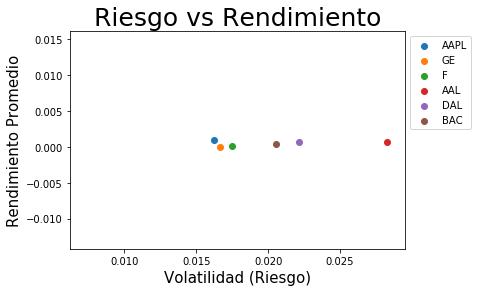

In [51]:
fig, ax = plt.subplots(1,1)
lista_etiquetas = ["AAPL", "GE", "F", "AAL", "DAL", "BAC"]

for i in range(len(lista_etiquetas)):
    scatter = plt.scatter(x = lista_volatilidad[i], y = lista_rendimiento_logaritmico_promedio[i], label = lista_etiquetas[i] )

plt.title("Riesgo vs Rendimiento", fontsize = 25, color = "black",\
          fontname = "Console")
plt.ylabel("Rendimiento Promedio", fontsize = 15, color = "black")
plt.xlabel("Volatilidad (Riesgo)", fontsize = 15, color = "black")
plt.legend(loc = "upper left", bbox_to_anchor = (1,1)) #el tamaño de la leyenda se cambia con un diccionario
plt.show()